In [2]:
import ultra.visuals as v
from ultra.visuals import make_matplotlib_pretty_again 
from ultra import dataframe 
from matplotlib.ticker import FormatStrFormatter as fsf 
import matplotlib.pyplot as plt 
import numpy as np 
import sys 
import os 
_DATADIR_ = os.environ["DATA_DIRECTORY"] 

In [3]:
Vishnu = dataframe("%sVishnu/Vishnu_z0p0_200particle.hlist" % (_DATADIR_), 
    columns = [5, 10, 61, 16, 63, 26, 45], 
    labels = ["pid", "mvir", "mpeak", "vmax", "vpeak", "spinh", "spinb"]) 
ConsueloHD = dataframe("%sConsueloHD/ConsueloHD_z0p0_200particle.hlist" % (_DATADIR_), 
    columns = [5, 10, 61, 16, 63, 26, 45], 
    labels = ["pid", "mvir", "mpeak", "vmax", "vpeak", "spinh", "spinb"]) 
Vishnu = Vishnu.sieve("pid", "==", -1) 
ConsueloHD = ConsueloHD.sieve("pid", "==", -1) 

In [4]:
Vishnu["mfrac"] = list(map(lambda x, y: x / y, Vishnu["mvir"], Vishnu["mpeak"])) 
Vishnu["vfrac"] = list(map(lambda x, y: x / y, Vishnu["vmax"], Vishnu["vpeak"])) 
ConsueloHD["mfrac"] = list(map(lambda x, y: x / y, ConsueloHD["mvir"], ConsueloHD["mpeak"])) 
ConsueloHD["vfrac"] = list(map(lambda x, y: x / y, ConsueloHD["vmax"], ConsueloHD["vpeak"])) 

In [17]:
def analyze(data, spinkey, xkey, massbin, masskey, n, log = True): 
    if log: 
        subs = data.sieve(masskey, ">=", 10**massbin[0]).sieve(masskey, "<=", 10**massbin[1]).sieve("pid", "==", -1) 
    else: 
        subs = data.sieve(masskey, ">=", massbin[0]).sieve(masskey, "<=", massbin[1]).sieve("pid", "==", -1) 
    subs = subs.equal_number_subsamples(xkey, n) 
    xvals = [i.mean(xkey) for i in subs] 
    yvals = [i.mean(spinkey) for i in subs] 
    scat = [i.scatter(spinkey) for i in subs] 
    return [xvals, yvals, scat]

In [18]:
def draw(ax, xvals, yvals, scatter, color): 
    try: 
        stop = xvals.index(1.0) 
    except ValueError: 
        stop = len(xvals) - 1
    ax.plot(xvals[:stop], yvals[:stop], c = v.colors()[color]) 
    ax.plot(xvals[:stop], [i[0] for i in scatter][:stop], c = v.colors()[color], linestyle = ':') 
    ax.plot(xvals[:stop], [i[1] for i in scatter][:stop], c = v.colors()[color], linestyle = ':')  

In [29]:
def legend(ax, colors, labels): 
#     colors = ["crimson", "lime", "blue"] 
#     labels = [r"$M_\text{vir} = 10^{%g\pm0.1}\ h^{-1}\ M_\odot$" % (i) for i in [11, 12, 13]] 
    lines = 3 * [None] 
    for i in range(len(lines)): 
        lines[i] = ax.plot([0.8, 0.9], [0.04, 0.06], c = v.colors()["white"], label = labels[i])[0] 
    leg = ax.legend(loc = v.mpl_loc("upper left"), ncol = 1, frameon = False, handlelength = 0, 
        bbox_to_anchor = (0.01, 0.98)) 
    for i in range(len(lines)): 
        lines[i].remove()
        leg.get_texts()[i].set_color(colors[i]) 

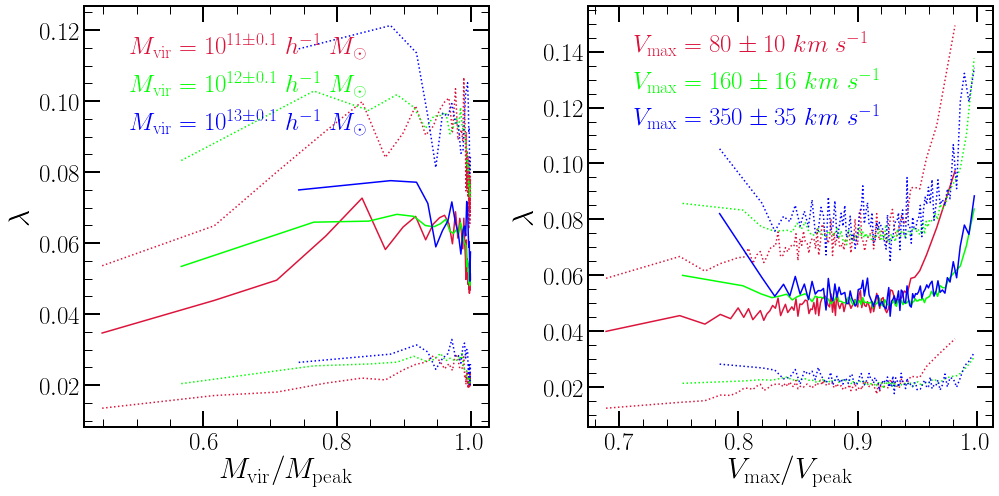

In [30]:
xlabels = [r"$M_\text{vir}/M_\text{peak}$", r"$V_\text{max}/V_\text{peak}$"]
fig = plt.figure(figsize = (14, 7)) 
axes = 2 * [None] 
for i in range(2): 
    axes[i] = fig.add_subplot(121 + i, facecolor = "white") 
    axes[i].set_xlabel(xlabels[i]) 
    axes[i].set_ylabel(r"$\lambda$") 
    
xvals, yvals, scat = analyze(Vishnu, "spinb", "mfrac", [10.9, 11.1], "mvir", 100) 
draw(axes[0], xvals, yvals, scat, "crimson") 
xvals, yvals, scat = analyze(ConsueloHD, "spinb", "mfrac", [11.9, 12.1], "mvir", 100) 
draw(axes[0], xvals, yvals, scat, "lime") 
xvals, yvals, scat = analyze(ConsueloHD, "spinb", "mfrac", [12.9, 13.1], "mvir", 100) 
draw(axes[0], xvals, yvals, scat, "blue") 

xvals, yvals, scat = analyze(Vishnu, "spinb", "vfrac", [70, 90], "vmax", 100, log = False) 
draw(axes[1], xvals, yvals, scat, "crimson") 
xvals, yvals, scat = analyze(ConsueloHD, "spinb", "vfrac", [144, 176], "vmax", 100, log = False) 
draw(axes[1], xvals, yvals, scat, "lime") 
xvals, yvals, scat = analyze(ConsueloHD, "spinb", "vfrac", [315, 385], "vmax", 100, log = False) 
draw(axes[1], xvals, yvals, scat, "blue")  

legend(axes[0], ["crimson", "lime", "blue"], 
    [r"$M_\text{vir} = 10^{%g\pm0.1}\ h^{-1}\ M_\odot$" % (i) for i in [11, 12, 13]]) 
legend(axes[1], ["crimson", "lime", "blue"], 
    [r"$V_\text{max} = %g\pm%g\ km\ s^{-1}$" % (i[0], i[1]) for i in [[80, 10], [160, 16], [350, 35]]]) 

plt.tight_layout() 
plt.savefig("spin_v_mviroverpeak_vmaxoverpeak.pdf") 